##### This notebook shows how to read the EEG data from Motor Imagery dataset, transform it to MNE-python classes and export the raw and events files as .fif

In [1]:
import mne 
import numpy as np
import matplotlib.pyplot as plt

from utils.utils import data2mne
from utils.utils import create_name

mne.set_log_level(verbose='WARNING')

%matplotlib qt

c:\Users\andresfs\OneDrive - NTNU\Research\Github\ERDS_Maps\utils\utils.py:109: SyntaxWarning: invalid escape sequence '\s'
  fname = folder + '\s' + '{:02d}'.format(subject) + '.mat'
c:\Users\andresfs\OneDrive - NTNU\Research\Github\ERDS_Maps\utils\utils.py:111: SyntaxWarning: invalid escape sequence '\s'
  fname = folder + '\s' + '{:02d}'.format(subject) + '_' + type + '.fif'


In [2]:
# Define the subject and the folder where the data is located
subject = 41
data_folder = r"C:\Users\andresfs\OneDrive - NTNU\Datasets\Dataset MI - GigaScience\EEG_Data"
fname_mat = create_name(subject,data_folder)

# Convert .mat data to a raw object of MNE-python
raw = data2mne(fname_mat, scale=1e-8) # This scale was selected for better visualization of the data "similar to typical EEG" units. The original scale was not informed in the dataset.

# Change the custom montage to standard positions for better visualization
biosemi64_montage = mne.channels.make_standard_montage('biosemi64')
raw.set_montage(biosemi64_montage)

# Event ID definition
event_id = {'Blink':1,'Up/Down':2,'Left/Right':3,'Jaw':4,'HeadMov':5, 'Resting':6, 'ME_Right':7, 'ME_Left':8, 'MI_Right':9, 'MI_Left':10}
# Read events from Stimuli channel
events = mne.find_events(raw, stim_channel='Stim', verbose=True,initial_event=True)

# Filter only imaginary events
event_id_MI = {'MI_Right':9, 'MI_Left':10}
events_MI = events[events[:,2] > 8]



246 events found on stim channel Stim
Event IDs: [ 1  2  3  4  5  6  7  8  9 10]


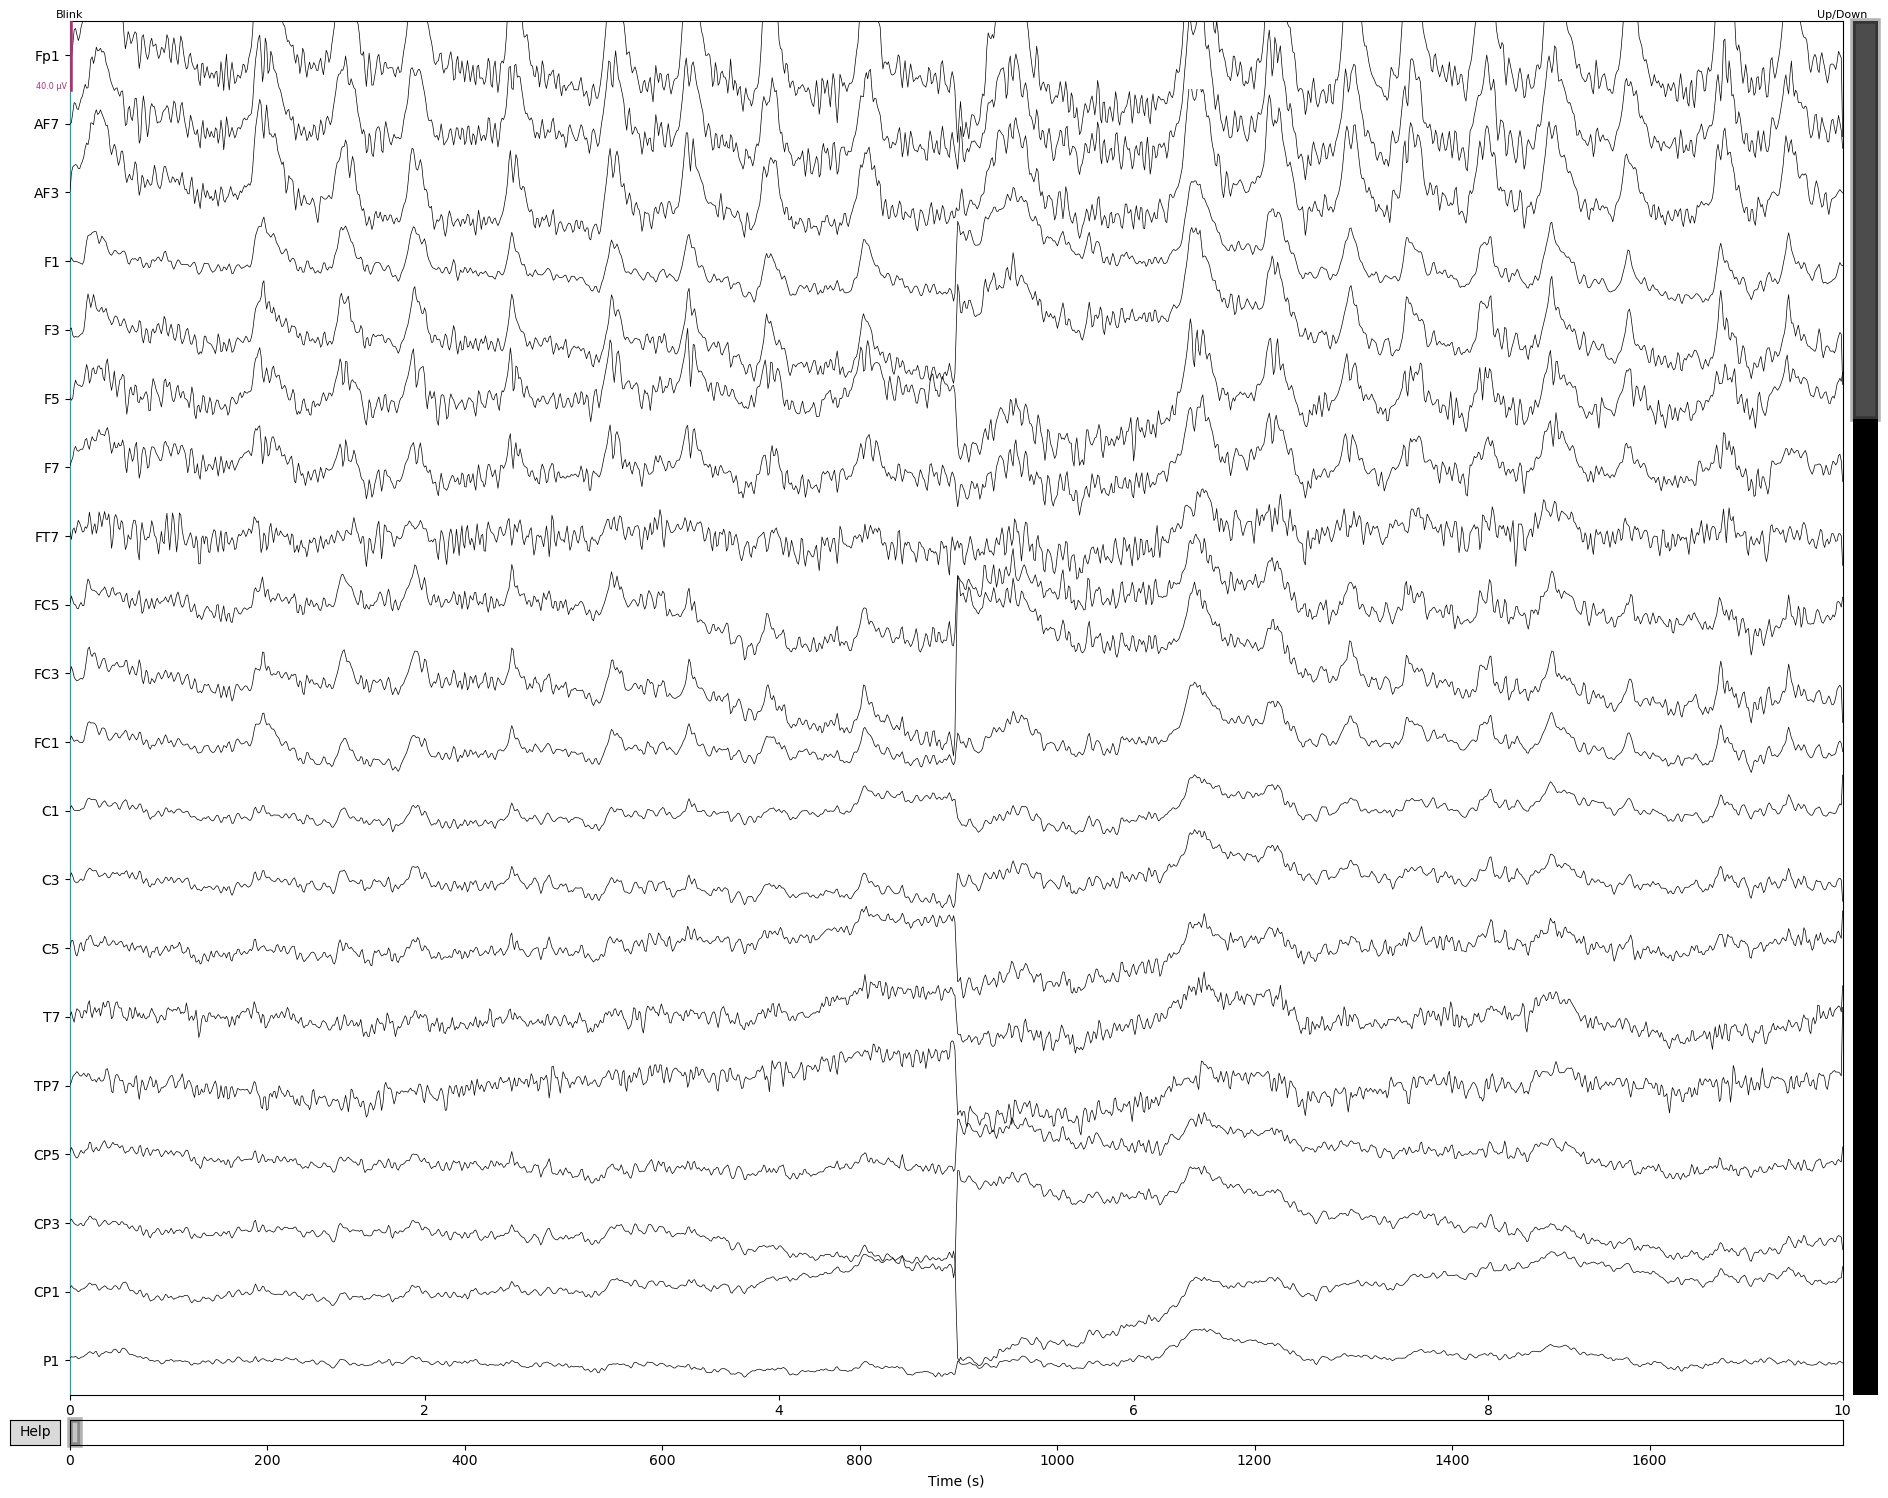

In [3]:
# Plot the raw data with all the events
# The data was splited in multiple event types. To create a raw object the events were merged in a single array. Therefore notice there are "jumps" in the data in the joint of the events
raw.plot(highpass=0.1, lowpass=40, title='Raw EEG data', events=events, event_id=event_id)

In [4]:
# Export raw data to a .fif file
output_folder = r"C:\Users\andresfs\OneDrive - NTNU\Datasets\Dataset MI - GigaScience\Derivates"
raw_fname = create_name(subject, output_folder, type='raw')
raw.save(raw_fname, overwrite=True)


In [6]:
# Export events data to a .fif file

# all events
events_fname = create_name(subject, output_folder, type='eve')
mne.write_events(events_fname, events, overwrite=True)

# only motor imagery events
events_MI_fname = create_name(subject, output_folder, type='MI_eve')
mne.write_events(events_MI_fname, events_MI, overwrite=True)
